<div class="alert alert-block alert-success">
    <b><center>DEEP NEURAL NETWORK</center></b>
    <b><center>MNIST 데이터로 DNN 구현해 보기</center></b>
</div>

# Configure Learning Environment

In [1]:
# !pip install git+https://github.com/nockchun/rspy --force
import rspy as rsp
rsp.setSystemWarning(off=True)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
from ipywidgets import interact
import tensorflow as tf
from tensorflow.keras import utils, layers, models, losses

In [3]:
np.set_printoptions(linewidth=200, precision=2)
sns.set_style("whitegrid")
tf.__version__

'2.0.0'

# Prepare Datas

In [4]:
# Download the mnist dataset using keras
(trainDatas, trainLabels), (testDatas, testLabels) = tf.keras.datasets.mnist.load_data()
trainDatas.shape, trainLabels.shape, testDatas.shape, testLabels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

# Analysis Datas

In [5]:
@interact(idx=(0, 60000))
def showImage(idx):
    plt.imshow(trainDatas[idx], cmap="gray")
    plt.grid(False)
    plt.title(f"LABEL : {trainLabels[idx]}")
    plt.show()

interactive(children=(IntSlider(value=30000, description='idx', max=60000), Output()), _dom_classes=('widget-i…

In [6]:
trainDatas[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170, 253, 253, 253, 253, 253, 225, 172

# Preprocessing Data

In [7]:
# 2차원(28*28)이미지를 1차원 배열로 변환
trainDatas = trainDatas.reshape(-1, 28*28)
testDatas = testDatas.reshape(-1, 28*28)

trainDatas.shape, testDatas.shape

((60000, 784), (10000, 784))

In [8]:
# 레이블 one hot encoding
trainLabels = np.eye(10)[trainLabels]
testLabels  = np.eye(10)[testLabels]

trainLabels.shape, trainLabels.shape

((60000, 10), (60000, 10))

# Generate Model

In [9]:
model = models.Sequential([
    layers.Input([784]),
    layers.Dense(256, activation=tf.keras.activations.relu),
#     layers.Dropout(0.2),
    layers.Dense(10, activation=tf.keras.activations.softmax)
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


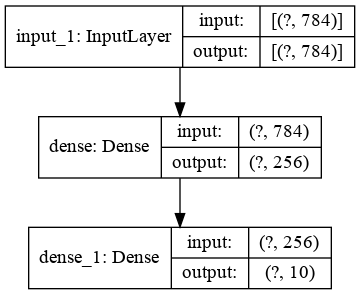

In [10]:
utils.plot_model(model, 'model.png', show_shapes=True)

In [11]:
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics = ["accuracy"]
)

# Training

In [12]:
history = model.fit(
    trainDatas, trainLabels,
    batch_size=1000,
    epochs=20,
    validation_split=0.3
)

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
42000/42000 [==============================] - 1s 14us/sample - loss: 39.1136 - accuracy: 0.4507 - val_loss: 14.4287 - val_accuracy: 0.7008
Epoch 2/20
42000/42000 [==============================] - 0s 2us/sample - loss: 11.1963 - accuracy: 0.7565 - val_loss: 8.5245 - val_accuracy: 0.8024
Epoch 3/20
42000/42000 [==============================] - 0s 2us/sample - loss: 7.4541 - accuracy: 0.8227 - val_loss: 6.4991 - val_accuracy: 0.8406
Epoch 4/20
42000/42000 [==============================] - 0s 2us/sample - loss: 5.7856 - accuracy: 0.8528 - val_loss: 5.4673 - val_accuracy: 0.8619
Epoch 5/20
42000/42000 [==============================] - 0s 3us/sample - loss: 4.7415 - accuracy: 0.8715 - val_loss: 4.7730 - val_accuracy: 0.8756
Epoch 6/20
42000/42000 [==============================] - 0s 2us/sample - loss: 4.0157 - accuracy: 0.8854 - val_loss: 4.3406 - val_accuracy: 0.8827
Epoch 7/20
42000/42000 [==============================] - 

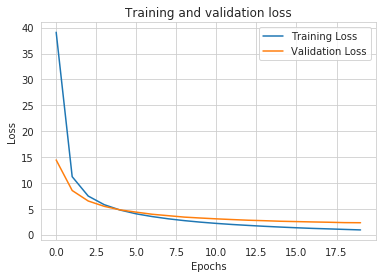

In [13]:
loss = history.history["loss"]
validationLoss = history.history["val_loss"]
epochs = range(0, len(loss))

plt.plot(epochs, loss, label="Training Loss")
plt.plot(epochs, validationLoss, label="Validation Loss")
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate

In [14]:
evaLoss, evaAcc = model.evaluate(testDatas, testLabels,verbose=0)
evaLoss, "{:3.2f} %".format(evaAcc*100)

(2.1967983670233666, '92.35 %')

# Predict

In [15]:
@interact(idx=(0, 10000))
def showTestImage(idx):
    data = testDatas[idx].reshape(-1, 784)
    dataPred = model.predict(data)
    
    plt.imshow(testDatas[idx].reshape(28,28), cmap="gray")
    plt.grid(False)
    plt.title(f"LABEL: {np.argmax(testLabels[idx])}, PREDICT: {np.argmax(dataPred)}")
    plt.show()

interactive(children=(IntSlider(value=5000, description='idx', max=10000), Output()), _dom_classes=('widget-in…